# COGS 108 - Final Project 

# Overview

We are interested to see what makes a song popular? Is it the name of the artist, the name of the song, the amount of instruments being used, or perhaps the songs tempo? Does the song have to be a happy one or a sad one? Using a musics characteristics, we would try to see what plays a significant part to a songs popularity and what does not.

# Names

- Aiden Yoon
- Dylan Bragdon
- Tianheng Liu
- Donghwi Park
- Ivan Perez

# Research Question

Can we use Spotify's metrics of basic features of songs in order to predict the songs's Spotify popularity?

## Background and Prior Work

Music is all around us. We listen to it in the radio, television, online, while we study, work, or during our free time. After realizing that we all listen to different genres of music, we also realized that we all still know and recognize the most popular songs, regardless if we listen to it on a daily or only once. For example, we all know the song "Despacito" even if only one of us could really understand what they are saying or really enjoys it. With this realization in mind, we became curious as to what made a song popular and we asked ourselves; When a song skyrockets to the top of the charts, is there some quantifiable difference between a popular song, and a song that doesn’t even come close in popularity? 

Much research has been done in attempts to reveal the intrinsic musical qualities that songs within the same realm of popularity and/or genre share [1], [2], [3]. In the study done by Berenzweig, Ellis, and Lawrence, we see that it is possible to classify popularity and similarity between songs based on the genre and artist name by using a set of each of them as an "anchor" or weight for classifying. Although it was not as accurate when classifying, having an accuracy score of 40%, this is a method that could be further developed and could possibly be a way to classify music. While Berenzweig, Ellis, and Lawrence focused on the name and genre of the song for classification, Berenzweig, Logan, Ellis, and Whitman were more intrested in audio features of a song and found that by using these features, we could also classify songs. Lastly, in the study done by Logan and Dhanaraj, they try to predict if a song would be popular based on the lyrics and the auditory features of each song. What Logan and Dhanaraj found was that there is a pattern in between popular music, with lyrics being the best at classifying popular music. with these findings in mind, our team’s goal is to utilize the intuitions established by the prior research mentioned, combined with the affordances of our data, in order to reveal a predictable trend in song popularity.

The data in question comes from Spotify and contains information for almost 230,000 songs, with details regarding valence, time signature, tempo, and 11 more musical features that describe each individual track. Our end goal is to seek out relationships between these variables and song popularity. Perhaps there is some “goldilocks” combination of variables that performs at least moderately well in predicting a song’s final popularity. We also plan to analyze the dataset comparatively by genre, as the data has been conveniently compartmentalized into groups of approximately 10,000 per genre.


References (include links):
- 1) A. Berenzweig, D. P. W. Ellis, and S. Lawrence. Anchor space for classification and similarity measurement of music. In ICME 2003, pages 29–32, 2003.
- 2) A. Berenzweig, B. Logan, D.P.W. Ellis, and B. Whitman. A large-scale evaluation of acoustic and subjective music similarity measures. In Proceedings International Conference on Music Information Retrieval (ISMIR), pages 103–109, 2003.
- 3) Dhanaraj, Ruth & Logan, Beth. (2005). Automatic Prediction of Hit Songs. 488-491.


# Hypothesis


Can the popularity of a song be predicted? And if so, which factors play the most important part in determining if a song will be popular or not? 

- Our team predicts that popularity can be predicted based on a song's speechiness, danceability, loudness, energy, valence and tempo. These features are based on the values that Spotify automatically extracted from each song using their own methods.

# Dataset(s)

### Dataset Info:
- Dataset Name: Spotify Tracks DB
- Link to the dataset: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db
- Number of observations: 228159 songs

### Description:
This is a dataset conprising of 228159 songs in which each song has 18 features, including 1 of 26 unique genres, the name of the artist, name of the song, a popularity score from the range of 0-100, and musical qualities such as danceability, energy, tempo, key, and more. Each feature is described more in detail below.

- “genre” : The song’s genre, based on Spotify’s classifications.
- “artist_name”: Artist name on Spotify.
- “track_name”: Name of the song in the given datapoint.
- “track_id”: Unique ID given to song by Spotify.
- “popularity”: Popularity of the song calculated based on Spotify’s algorithm. 
    - According to Spotify, this number (Between 0 and 100) has most to do with the number of plays the song has. More info on popularity metric here: 
https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/
- “acousticness”: A confidence score (from 0.0 to 1.0) of how likely the song is to be acoustic. 
- “danceability”: Spotify’s metric for how suitable the song is for dancing to. Ranges from 0.0 (least danceable) to   1.0 (most danceable). 
- “duration_ms”: How long the song is, in milliseconds. 
- “energy”: Spotify’s representation of perceptual measure of intensity and activity.
- “instrumentalness”: Confidence score detecting if a song contains vocals. From 0.0 to 1.0.
- “key”: Spotify’s estimation of the key of the track. 
- “liveness”: Confidence score on whether a song is being played live or not. From 0.0 to 1.0. 
- “loudness”: Loudness of the song in decibels. 
- “mode”: Modality (major or minor) of the song. 
- “speechiness”: Confidence score on if a track consists mostly of spoken words, rather than music.
- “tempo”: Tempo of the track in BPM. 
- “time_signature”: Estimated time signature of the track. 
- “valence”: Scale from 0.0 to 1.0 describing musical positiveness conveyed by the song. 

# Setup

In [47]:
# All the packages that we need import and are going to use throughout the project
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import patsy
from sklearn.svm import SVC
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
# Load in the csv file and show the first 5 elements to check if it read correctly
df = pd.read_csv('/Users/ivanperez/Desktop/SpotifyFeatures.csv')
df.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.231,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.201,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.470,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696


# Data Cleaning

Our data doesn't deal with any personal information, such as an email adresses or phone numbers, meaning our cleaning is not going to consist of following the Safe Harbour specifications. That said, our data is relatively 'clean' already, as the data is already in a metric that could be understood after loading it into a dataframe, which formatted everything nicely for us already. 

When looking at the data at first glance, most of the data is already in numerical form, so that data could be used as is for visualization and analysis. There is some data such as the genre, artist name, track name, time signature and key that is not in a numerical form, but the only one of those features that we are really going to focus on is the genre of the song. If we were to focus on these other non-numerical, we would most likely change it into numerical values so that it's easier to compare these values with the numerical ones. For example, we could give each key a numerical value with G = 1, C# = 2, E = 3, and so on that way we could use it in a scatterplot or histogram. However, at this moment, we are not planning on using these values for our analysis, so we are most likely just going to drop them or ignore them for the time being.

However, because there are so many songs and features for each song, we are going to do a sanity check and see if we don't have any null values or any weird values that could mess up our analysis.

In [3]:
# First, let's make sure that we don't have any null values
df.isnull().values.any()

False

Now that we know that we don't have null values, let's make sure that we don't have any duplicates. We could do this by checking both the track_name and artist_name, or we could use the already given track_id that is unique to that track, but could show up multipe times if there's a duplicate. 

In [42]:
df_duplicates = df[df.duplicated(['track_id'], False)].sort_values('track_id')

print("The number of unique duplicates are: ", \ 
      df[df.duplicated(['track_id'])].sort_values('track_id').shape[0] )

print("The number of total duplicates are: ", \
      df[df.duplicated(['track_id'], False)].sort_values('track_id').shape[0])

df_duplicates.head(7)

The number of unique duplicates are:  74474
The number of total duplicates are:  108652


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1749,Dance,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.1310,0.748,188491,0.627,0.00000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
30928,Pop,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.1310,0.748,188491,0.627,0.00000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
20193,Alternative,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.0349,0.564,211789,0.808,0.00036,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
19507,Blues,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.0349,0.564,211789,0.808,0.00036,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
215915,Rock,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,58,0.0349,0.564,211789,0.808,0.00036,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
55585,Anime,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.0349,0.564,211789,0.808,0.00036,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
89207,Children’s Music,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.0349,0.564,211789,0.808,0.00036,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365


- As we could see, we have a bunch of duplicates! Although it doesn't seem to have an effect on some features such as the key and duration_ms, we could see that they vary a lot when it comes to their genre and some of them even have different popularity values depending which genre they are. This could change the way in which we look our data when we try to look at which genre is more popular than others. 

In [43]:
# Since we have duplicates, let's make sure that each duplicate doesn't have a different popularity value. 

duplicates_pop = df_duplicates.groupby(df_duplicates.track_id)\
                ['popularity'].unique()

duplicates_df = pd.DataFrame(duplicates_pop).reset_index()

diff_duplicates = duplicates_df[duplicates_df.popularity.apply(len)>1]

print("The number of songs that have different popularity value are: ", \
      diff_duplicates.shape[0])

diff_duplicates.head(3)

The number of songs that have different popularity value are:  5127


,track_id,popularity
1,001gDjxhKGDSx4sMMAgS9R,"[57, 58]"
10,007n10xGvSbc7dKgAORVIq,"[56, 55]"
32,00KfIFi2TpAaQGPbRbFbKJ,"[62, 61]"


- We could see that there are significant amount of songs that have different popularity values. However, when we look at all of them, they all only have 2 popularity values and they all are off by 1 point. So, if were were to take the average of the two values and round up, we would end up with the highest popularity value. In this case, we would drop the lowest popularity value and keep the highest.

In [44]:
# Let's see if the duplicates have different genres.
unique_genres = df_duplicates.groupby(df_duplicates.track_id)\
                ['genre'].unique()

genre_df = pd.DataFrame(unique_genres).reset_index()

diff_genre_duplicates = genre_df[genre_df.genre.apply(len) > 1]

print("The number of songs that have different genres are: ", \
      diff_genre_duplicates.shape[0])

diff_genre_duplicates.head(3)

The number of songs that have different genres are:  34178


,track_id,genre
0,000xQL6tZNLJzIrtIgxqSl,"[Dance, Pop]"
1,001gDjxhKGDSx4sMMAgS9R,"[Alternative, Blues, Rock, Anime, Children’s M..."
2,001ifh9Zkyc5DhK7AGQRtK,"[Folk, Indie]"


- As we could see, all of the songs have different genres, which means that are being counted multiple times for different genres.

The reason why we considered to remove duplicates is if we look at some of the most popular song, we see that it's the same song, except that it's different genre each time, but consist of the same popularity score regardless of the genre. 

In [7]:
df[df.popularity >= 99].sort_values(['track_id'])

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
12710,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
159005,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
12708,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
159004,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
12709,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
68784,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385


- After noticing that since we are working with averages, the duplicates don't have much of an affect when we draw our histograms and visualize our data later on. That said, we decided to keep the duplicates to keep our data more true, but we would still take into consideration that there are duplicates.

# Data Analysis & Results

First, we want to see which genre is the most popular out of all of them. We could see this by looking at the genre and taking the mean of all the popularity scores respectively.

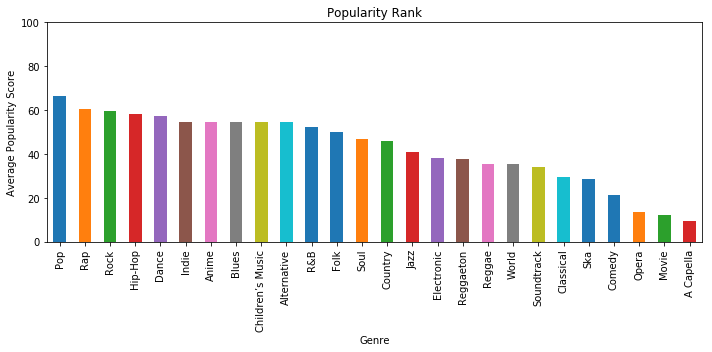

In [8]:
plt.figure(figsize=(10,5))
pop_genre = df.groupby(['genre']).mean().sort_values(['popularity'], \
                                         ascending=False).popularity.plot.bar()

plt.ylabel('Average Popularity Score')
plt.xlabel('Genre')
plt.title('Popularity Rank')
plt.ylim(0,100)
plt.tight_layout()

- We could see right away that the most popular genre out of all of them is 'Pop' with Rap and Rock being the runner-ups. But why is pop the most popular? What makes pop different from the others? From the graph, if we look at the two extremes, Pop is a genre that is generally loud, danceable, and has a combination of instrumentals (live or digital). On the otherhand, the least popular genre is A Capella which is the opposite of pop. It has no instrumentals and it's completly dependent on the performers vocals. So, from here we could start to predict popularity based on instrumentals or liveliness.

Before we start making any assumptions, let's make sure that there aren't any other reasons as to why Pop is the most popular. So, we would first check that it's not because there are simply more Pop songs than anyother song.

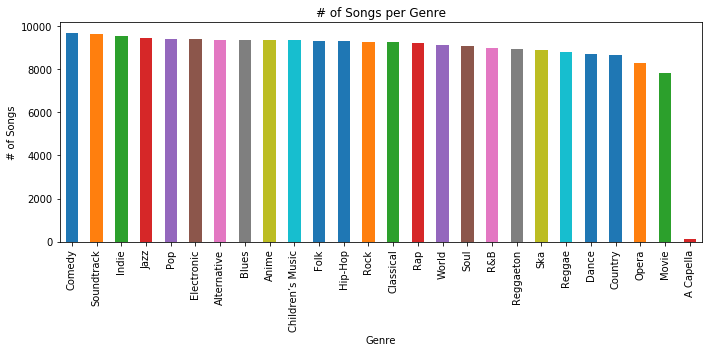

In [9]:
plt.figure(figsize=(10,5))

num_genre = df.genre.value_counts().plot.bar()
plt.ylabel('# of Songs')
plt.xlabel('Genre')
plt.title("# of Songs per Genre")

plt.tight_layout()

- Interestingly, there ARE less A Cappella songs overall, but the Pop genre also doesn't have the most songs in our data set. Funny enough, the genre that actually has the most songs is Comedy, so natrually one would assume that Comedy would be the most popular, but we already know that it is not. So, the question still remains; What makes pop songs so popular?

Let's first look at the features of the Pop genre, meaning, let's see how danceable, how lively, how loud, how fast it is, see how they are related, and compare those same features with the Comedy genre. If we are able to see a clear difference between the two in features, then we should be able to see why Pop songs are more popular. In order to make a good comparison, since we have a lot of data points for each genre, we have to use histograms as our best model for comparisons.

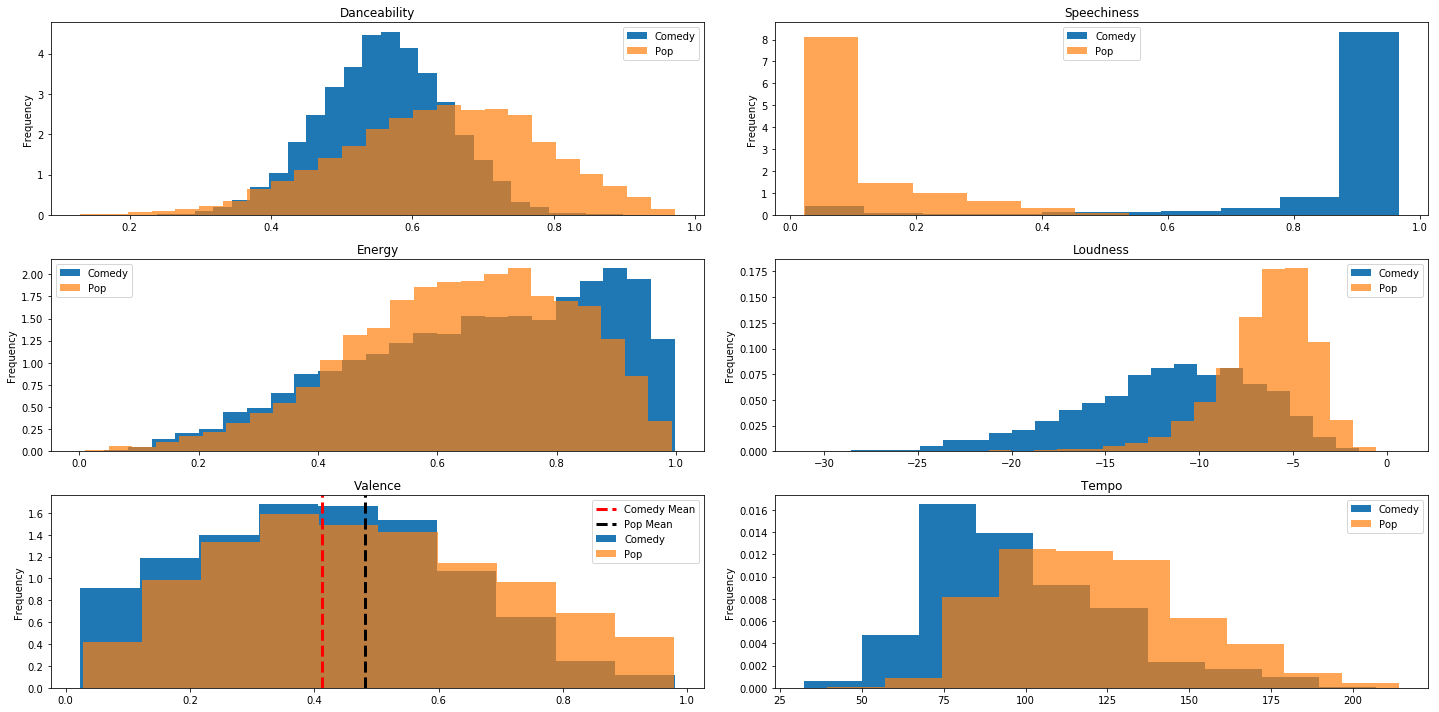

In [10]:
plt.figure(figsize=(20,10))

# Histogram For Danceability
plt.subplot(3,2,1)
comedy_dance = df[df['genre'] == 'Comedy'].danceability.\
                plot.hist(bins=25,label='Comedy',density=True )

pop_dance = df[df['genre'] == 'Pop'].danceability.\
                plot.hist(bins=25, label='Pop', alpha=0.7,density=True)
plt.title("Danceability")
plt.legend(loc=0)


# Histogram for Speechiness
plt.subplot(3,2,2)
comedy_speech = df[df['genre'] == 'Comedy'].speechiness.\
                plot.hist(label='Comedy',density=True)

pop_speech = df[df['genre'] == 'Pop'].speechiness.\
                plot.hist(label='Pop',density=True,alpha=.7)
plt.title("Speechiness")
plt.legend(loc=0)


# Histogram for Energy
plt.subplot(3,2,3)
comedy_energy = df[df['genre'] == 'Comedy'].energy.\
                plot.hist(bins=25,label='Comedy', density=True)

pop_energy = df[df['genre'] == 'Pop'].energy.\
                plot.hist(bins=25,label='Pop', alpha=.7, density=True)
plt.title("Energy")
plt.legend(loc=0)


#Histogram for Loudness
plt.subplot(3,2,4)
comedy_loud = df[df['genre'] == 'Comedy'].loudness.\
                plot.hist(bins=25,label='Comedy', density=True)

pop_loud = df[df['genre'] == 'Pop'].loudness.\
                plot.hist(bins=25,label='Pop',density=True, alpha=0.7)
plt.title("Loudness")
plt.legend(loc=0)

#Histogram for Valence
plt.subplot(3,2,5)
comedy_val = df[df['genre'] == 'Comedy'].valence.\
                plot.hist(label='Comedy', density=True)
plt.axvline(df[df['genre'] == 'Comedy'].valence.\
                mean(), color='red', linestyle='dashed', linewidth=3, label='Comedy Mean')

pop_val = df[df['genre'] == 'Pop'].valence.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.axvline(df[df['genre'] == 'Pop'].valence.\
                mean(), color='black', linestyle='dashed', linewidth=3, label='Pop Mean')

plt.title("Valence")
plt.legend(loc=0)

#Histogram for Tempo
plt.subplot(3,2,6)
comedy_temp = df[df['genre'] == 'Comedy'].tempo.\
                plot.hist(label='Comedy', density=True)

pop_temp = df[df['genre'] == 'Pop'].tempo.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.title("Tempo")
plt.legend(loc=0)

plt.tight_layout()

- When we compare Pop and Comedy, we see that Pop music is more danceable, it's louder, and faster than Comedy music. Also, Pop music has less spoken words and is more positive than Comedy music, but comedy music has more energy than Pop. So, based on this information, it looks like the more danceable, louder, faster, instrumental, and positive the song is, then the more popular it would be. However, this is only a comparison with one other genre, so let us compare it to the least popular genre, A Capella, and the runner-up genre, Rap, and see if the pattern holds.

#### Compare Pop with A-Capella

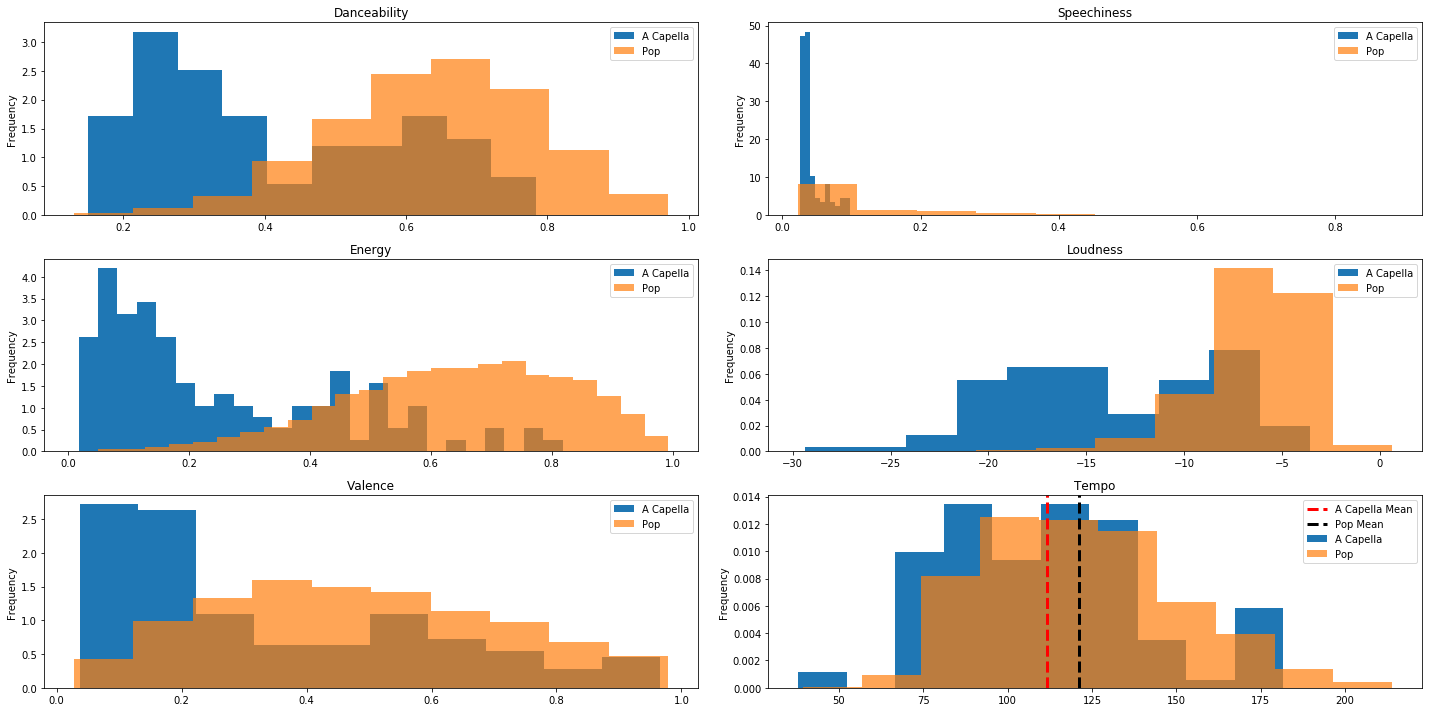

In [11]:
plt.figure(figsize=(20,10))

# Histogram For Danceability
plt.subplot(3,2,1)
cap_dance = df[df['genre'] == 'A Capella'].danceability.\
                plot.hist(label='A Capella',density=True )

pop_dance = df[df['genre'] == 'Pop'].danceability.\
                plot.hist(label='Pop', alpha=0.7,density=True)
plt.title("Danceability")
plt.legend(loc=0)

# Histogram for Speechiness
plt.subplot(3,2,2)
cap_speech = df[df['genre'] == 'A Capella'].speechiness.\
                plot.hist(label='A Capella',density=True)

pop_live = df[df['genre'] == 'Pop'].speechiness.\
                plot.hist(label='Pop', alpha=0.7,density=True)
plt.title("Speechiness")
plt.legend(loc=0)

# Histogram for Energy
plt.subplot(3,2,3)
cap_energy = df[df['genre'] == 'A Capella'].energy.\
                plot.hist(bins=25,label='A Capella', density=True)

pop_energy = df[df['genre'] == 'Pop'].energy.\
                plot.hist(bins=25,label='Pop', alpha=.7, density=True)
plt.title("Energy")
plt.legend(loc=0)

#Histogram for Loudness
plt.subplot(3,2,4)
cap_loud = df[df['genre'] == 'A Capella'].loudness.\
                plot.hist(label='A Capella', density=True)

pop_loud = df[df['genre'] == 'Pop'].loudness.\
                plot.hist(label='Pop',density=True, alpha=0.7)
plt.title("Loudness")
plt.legend(loc=0)

#Histogram for Valence
plt.subplot(3,2,5)
cap_val = df[df['genre'] == 'A Capella'].valence.\
                plot.hist(label='A Capella', density=True)

pop_val = df[df['genre'] == 'Pop'].valence.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.title("Valence")
plt.legend(loc=0)

#Histogram for Tempo
plt.subplot(3,2,6)
cap_temp = df[df['genre'] == 'A Capella'].tempo.\
                plot.hist(label='A Capella', density=True)
plt.axvline(df[df['genre'] == 'A Capella'].tempo.
                mean(), color='red', linestyle='dashed', linewidth=3, label='A Capella Mean')

pop_temp = df[df['genre'] == 'Pop'].tempo.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.axvline(df[df['genre'] == 'Pop'].tempo.\
                mean(), color='black', linestyle='dashed', linewidth=3, label='Pop Mean')
plt.title("Tempo")
plt.legend(loc=0)

plt.tight_layout()

#### Compare Pop with Rap

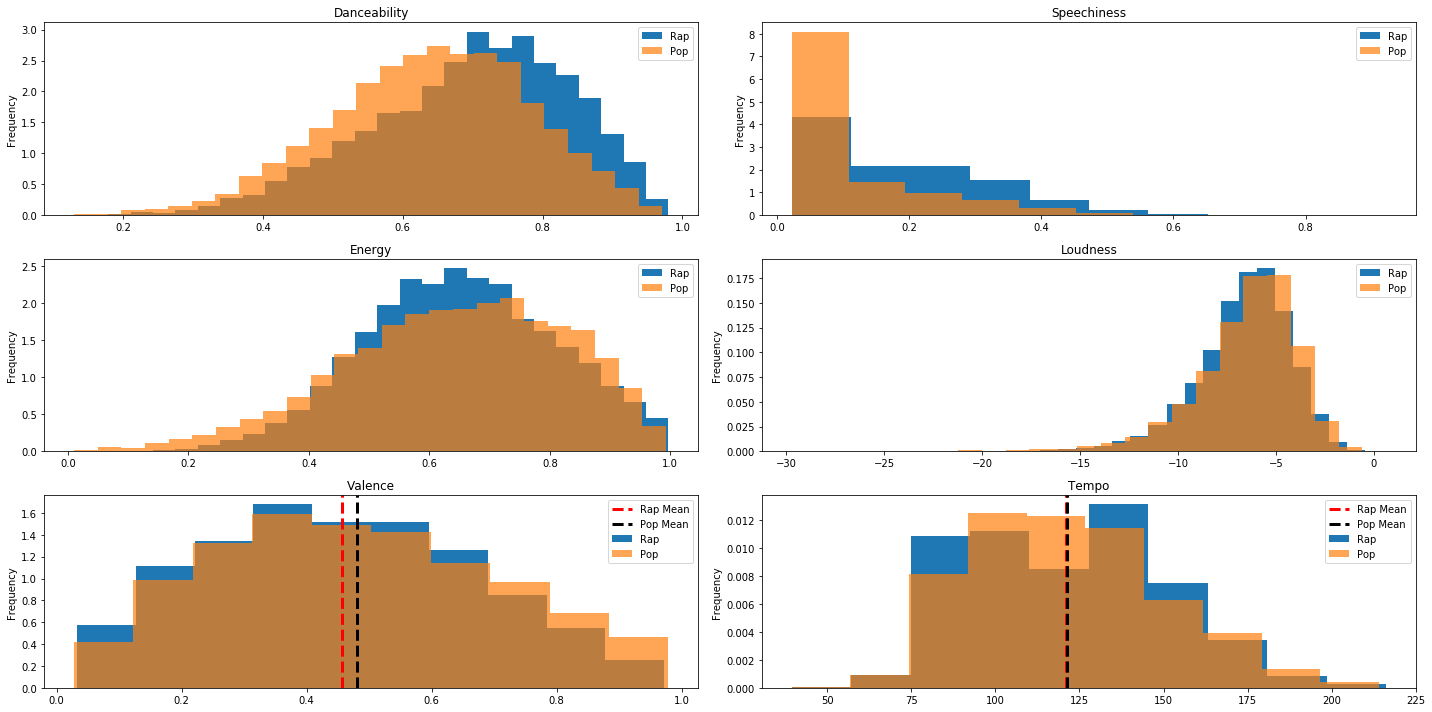

In [12]:
plt.figure(figsize=(20,10))

# Histogram For Danceability
plt.subplot(3,2,1)
rap_dance = df[df['genre'] == 'Rap'].danceability.\
                plot.hist(bins=25,label='Rap',density=True )

pop_dance = df[df['genre'] == 'Pop'].danceability.\
                plot.hist(bins=25, label='Pop', alpha=0.7,density=True)
plt.title("Danceability")
plt.legend(loc=0)


# Histogram for Speechiness
plt.subplot(3,2,2)
rap_speech = df[df['genre'] == 'Rap'].speechiness.\
                plot.hist(label='Rap',density=True)

pop_speech = df[df['genre'] == 'Pop'].speechiness.\
                plot.hist(label='Pop',density=True,alpha=.7)
plt.title("Speechiness")
plt.legend(loc=0)


# Histogram for Energy
plt.subplot(3,2,3)
rap_energy = df[df['genre'] == 'Rap'].energy.\
                plot.hist(bins=25,label='Rap', density=True)

pop_energy = df[df['genre'] == 'Pop'].energy.\
                plot.hist(bins=25,label='Pop', alpha=.7, density=True)
plt.title("Energy")
plt.legend(loc=0)


#Histogram for Loudness
plt.subplot(3,2,4)
rap_loud = df[df['genre'] == 'Rap'].loudness.\
                plot.hist(bins=25,label='Rap', density=True)

pop_loud = df[df['genre'] == 'Pop'].loudness.\
                plot.hist(bins=25,label='Pop',density=True, alpha=0.7)
plt.title("Loudness")
plt.legend(loc=0)

#Histogram for Valence
plt.subplot(3,2,5)
rap_val = df[df['genre'] == 'Rap'].valence.\
                plot.hist(label='Rap', density=True)
plt.axvline(df[df['genre'] == 'Rap'].valence.\
                mean(), color='red', linestyle='dashed', linewidth=3, label='Rap Mean')

pop_val = df[df['genre'] == 'Pop'].valence.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.axvline(df[df['genre'] == 'Pop'].valence.\
                mean(), color='black', linestyle='dashed', linewidth=3, label='Pop Mean')

plt.title("Valence")
plt.legend(loc=0)

#Histogram for Tempo
plt.subplot(3,2,6)
rap_temp = df[df['genre'] == 'Rap'].tempo.\
                plot.hist(label='Rap', density=True)
plt.axvline(df[df['genre'] == 'Rap'].tempo.\
                mean(), color='red', linestyle='dashed', linewidth=3, label='Rap Mean')

pop_temp= df[df['genre'] == 'Pop'].tempo.\
                plot.hist(label='Pop',density=True,alpha=0.7)
plt.axvline(df[df['genre'] == 'Pop'].tempo.\
                mean(), color='black', linestyle='dashed', linewidth=3, label='Pop Mean')

plt.title("Tempo")
plt.legend(loc=0)

plt.tight_layout()

- From the comparisons between the Pop genre with A Capella and Rap genre, we could see that the pattern holds. Pop music is overall more danceable, louder, positive, faster than the other two genres. It also makes sense as to why A capella has less spoken words (speechness) since A Capella music made entirely from the performers mouths, no external instruments. However, when we look at the comparisons, we could see that Pop and Rap are very close to each other in each individual comparison, which makes sense since Pop and Rap are close to each other when we look at the average popularity graph.

Let's see if the top and bottom 10% of songs that are popular and unpopular follow the patterns that we have found and that they are also of the Pop or Comedy genre respectively. First, we have to seperate our data into the top 10 and bottom ten. 

In [13]:
top_ten = df.sort_values('popularity', ascending=False).\
            head(int(len(df.popularity)*(10/100)))
print("Top 10% Dataframe:")
display(top_ten.head(5))

bottom_ten = df.sort_values('popularity').\
            head(int(len(df.popularity)*(10/100)))
print("Bottom 10% Dataframe:")
display(bottom_ten.head(5))

Top 10% Dataframe:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
12710,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
159005,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
12709,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
12708,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
159004,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335


Bottom 10% Dataframe:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
209648,Movie,Charlton Heston,Caiaphas; Peter Denies Jesus; Judas Repents,3P2irJU7ybLw3ErvcwjrBE,0,0.887,0.543,231361,0.0349,0.0000,B,0.107,-27.187,Minor,0.4550,86.258,4/4,0.139
210233,Movie,Henri Salvador,Moi j'préfère la marche à pied,1JFHnqAbfuQZ3RlTUHvIhI,0,0.738,0.685,147800,0.4380,0.0000,E,0.904,-5.998,Minor,0.0911,117.793,4/4,0.533
210234,Movie,Henri Salvador,L'abeille Et Le Papillon,1JhkVsIckOKQwlYB6rXccj,0,0.853,0.601,149133,0.2010,0.0022,G#,0.326,-12.456,Major,0.0388,126.063,4/4,0.409
211650,Movie,Lucie Dolene,Amoureuse,1CTElLhxxG3GxlRKrMpP6E,0,0.834,0.326,181960,0.1930,0.0000,F,0.295,-11.545,Major,0.0351,104.307,3/4,0.341
210236,Movie,Michel Roux,L'aiguille creuse - Partie 4,1NY5TDiy9RrbW6s37SoQJ5,0,0.719,0.685,2306089,0.5020,0.0000,G#,0.340,-11.452,Major,0.9000,131.738,3/4,0.470


First, let's see how many of each song do we have in both the Top and Bottom 10%.

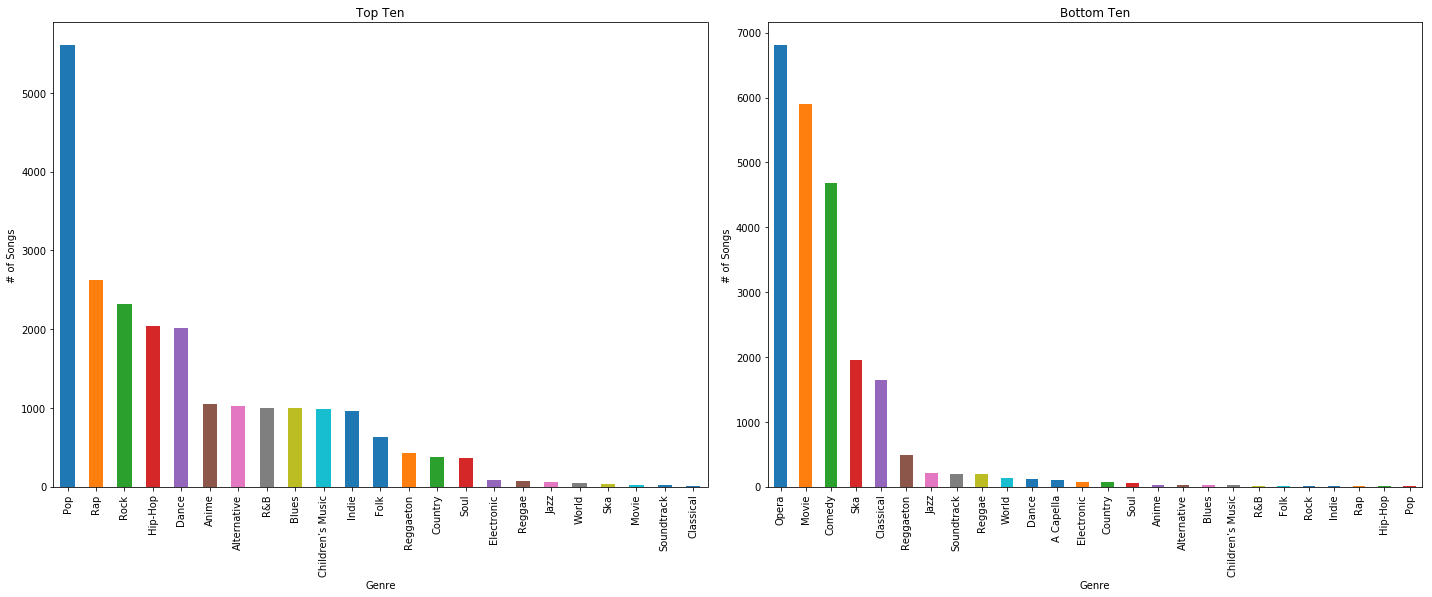

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
num_genre = top_ten.genre.value_counts().plot.bar()
plt.ylabel('# of Songs')
plt.xlabel('Genre')
plt.title('Top Ten')

plt.subplot(2,2,2)
num_genre = bottom_ten.genre.value_counts().plot.bar()
plt.ylabel('# of Songs')
plt.xlabel('Genre')
plt.title('Bottom Ten')

plt.tight_layout()

- Between the two bar graphs above, Pop is the genre most seen in the Top 10% most popular songs and at the same time, it's the least seen genre in the Bottom 10% least popular songs. This suggests that the Pop genre is the most popular out of them all. Let us now see if the average popularity score holds up and shows that the Pop genre is the most popular.

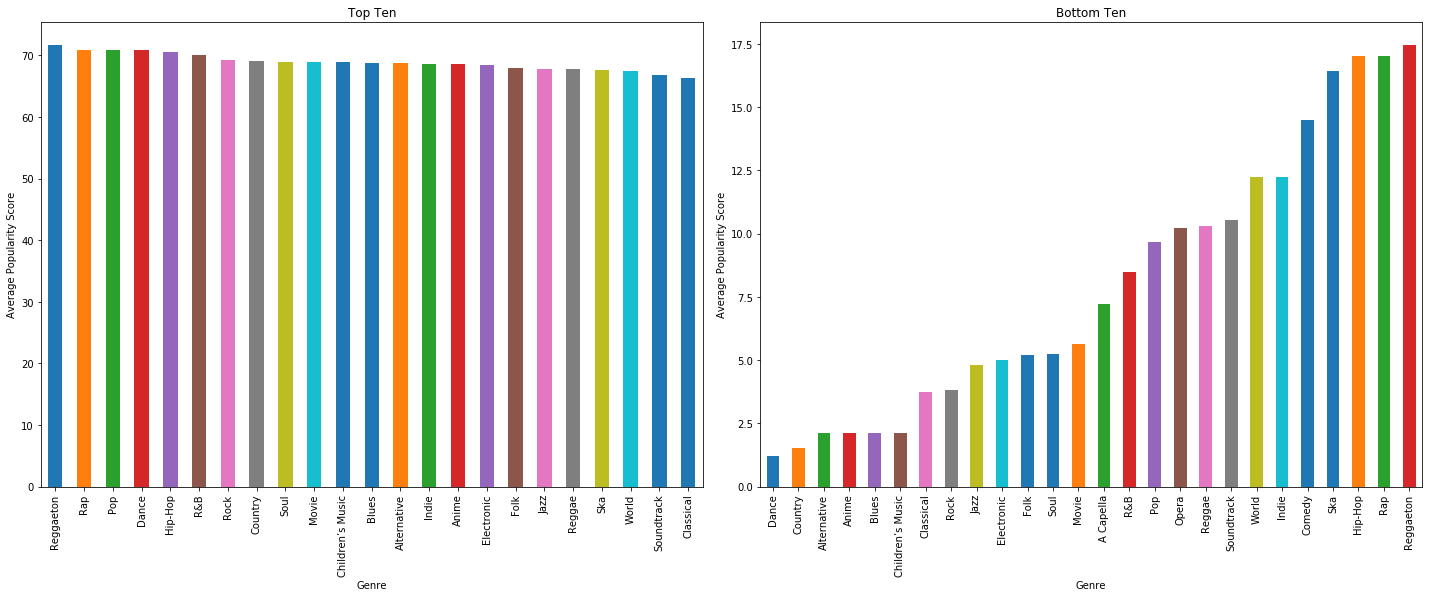

In [15]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
pop_genre = top_ten.groupby(['genre']).mean().sort_values\
                    (['popularity'], ascending=False).popularity.plot.bar()
plt.ylabel('Average Popularity Score')
plt.xlabel('Genre')
plt.title('Top Ten')

plt.subplot(2,2,2)
pop_genre = bottom_ten.groupby(['genre']).mean().sort_values\
                    (['popularity']).popularity.plot.bar()
plt.ylabel('Average Popularity Score')
plt.xlabel('Genre')
plt.title('Bottom Ten')

plt.tight_layout()


- When plotting the average popularity scores of the Top 10%, we would expect to see the Pop genre to be the most popular, but instead we are getting Reggaeton as our most popular, while Pop is actually the third most popular. Intrestingly, there are also way less Reggaeton songs in the top 10% than Pop songs, which makes us believe that the only reason why Reggaeton is so popular is because there are so few of them and they are all rated highly that it ends up having a higher average that Pop music. That said, we are going to check why Reggaeton songs are more popular before comparing the Top and Bottom 10% using histograms.

In [16]:
# Lets first see how many songs of each genre we have in the Top 10%
top_ten.genre.value_counts()

Pop                 5615
Rap                 2621
Rock                2326
Hip-Hop             2046
Dance               2010
Anime               1049
Alternative         1029
R&B                 1003
Blues               1001
Children’s Music     990
Indie                965
Folk                 633
Reggaeton            428
Country              379
Soul                 358
Electronic            90
Reggae                76
Jazz                  59
World                 47
Ska                   40
Movie                 22
Soundtrack            16
Classical             12
Name: genre, dtype: int64

In [17]:
# As we could see there's about 13 times more Pop songs than Reggaeton songs. 
#  Now let's see how the means compare.
print('Pop Popularity Average: ', top_ten[top_ten.genre == 'Pop'].\
                                  popularity.mean())

print('Reggaeton Popularity Average: ', top_ten[top_ten.genre == 'Reggaeton'].\
                                  popularity.mean())

Pop Popularity Average:  70.86821015138023
Reggaeton Popularity Average:  71.7733644859813


In [18]:
# Their averages are actually not that different, with Reggaeton only being more popular by 1 point
#  Last thing to check is the range of Popularity score for Pop and Reggaeton respectively.

print('Pop Popularity Score Range: ', top_ten[top_ten.genre == 'Pop'].popularity.min() , '-' , \
                                      top_ten[top_ten.genre == 'Pop'].popularity.max() )

print('Reggaeton Popularity Score Range: ', top_ten[top_ten.genre == 'Reggaeton'].popularity.min() , '-' , \
                                            top_ten[top_ten.genre == 'Reggaeton'].popularity.max() )

Pop Popularity Score Range:  64 - 100
Reggaeton Popularity Score Range:  64 - 98


After looking deeper as to why Reggaeton is more Popular than the Pop genre in the Top 10 percent, we could see that it's actually not by much with their averages and score ranges being pretty close to each other. Overall, Reggaeton just doesn't have much of a significant lead in order to say that it's more popular than the Pop Genre, it just so happens that the averages worked in favor of Reggaeton by 1 point.

Now that we know Reggaeton is not that much more Popular than Pop, let's see the features betweeen the Top and Bottom 10 percent by using the same histogram method we did above when comparing the Pop with a different Genre. This would further allow us to see if the same features are more dominant in the most popular songs overall.

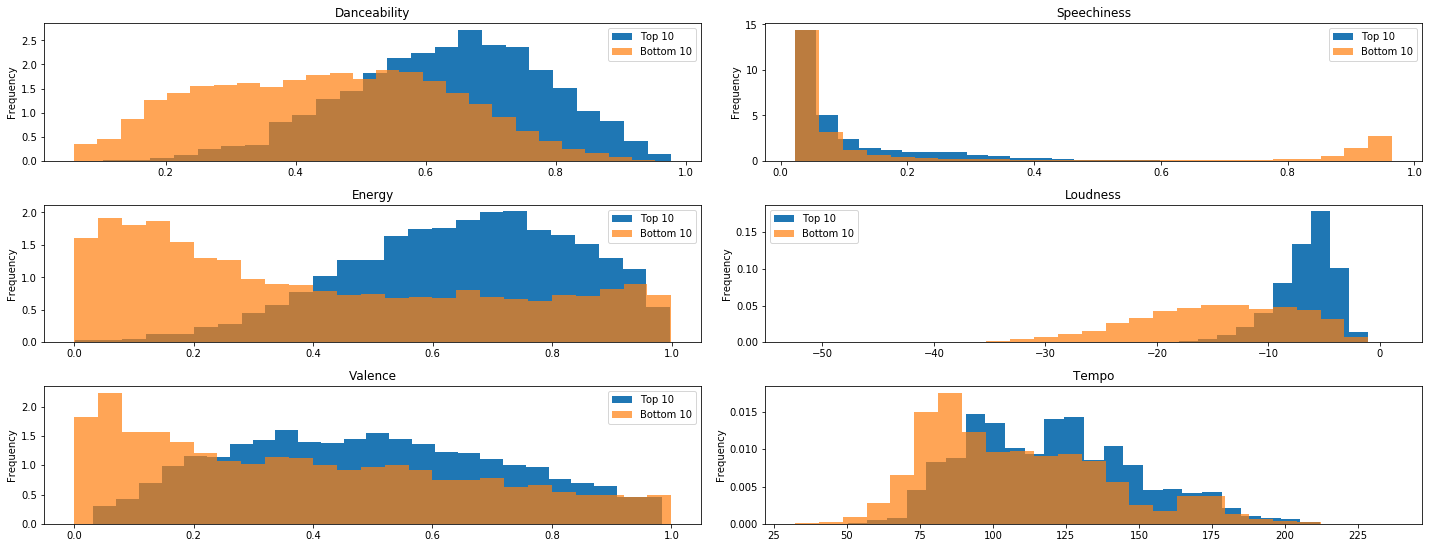

In [19]:
plt.figure(figsize=(20,10))

plt.subplot(4,2,1)
top_dance = top_ten.danceability.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_dance = bottom_ten.danceability.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Danceability")
plt.legend(loc=0)

plt.subplot(4,2,2)
top_speech = top_ten.speechiness.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_speech = bottom_ten.speechiness.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Speechiness")
plt.legend(loc=0)

plt.subplot(4,2,3)
top_energy = top_ten.energy.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_energy = bottom_ten.energy.
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Energy")
plt.legend(loc=0)

plt.subplot(4,2,4)
top_loud = top_ten.loudness.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_loud = bottom_ten.loudness.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Loudness")
plt.legend(loc=0)

plt.subplot(4,2,5)
top_val = top_ten.valence.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_val = bottom_ten.valence.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Valence")
plt.legend(loc=0)

plt.subplot(4,2,6)
top_temp = top_ten.tempo.\
                plot.hist(bins=25,label='Top 10',density=True )
bottom_temp = bottom_ten.tempo.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Tempo")

plt.tight_layout()

Looking at these histograms, we could see a clear difference between the Top 10% and Bottom 10% of music, confirming that popular music overall is more danceable, energetic, loud, positive, faster, less acoustic and has the least amount of spoken words. However, we want to go a bit further and see if we are able to "create" our own song giving it features as such and see if our song is popular or not.

- Note: The histogram for duration looks like figure below, but it's hard to interpret. It seems that they both have similar averages, with the most popular songs having the most. My guess as to why we have all the empty space to the right is that there is an outlier that we can't see.

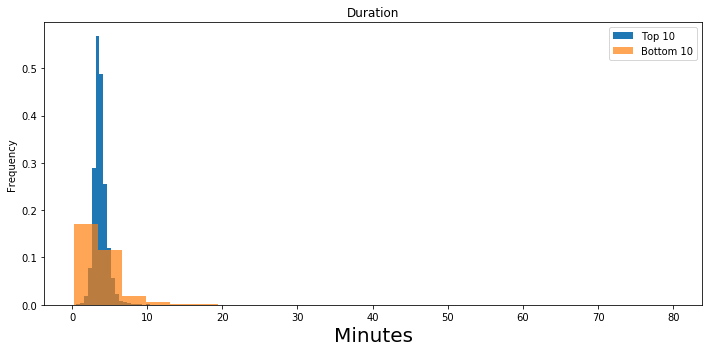

In [20]:
# Since duration is in milliseconds, we have to do some on the spot cleaning and change the millisecond to minutes
#  So that it's easier to interpret.

top_ten.duration_ms = top_ten.duration_ms/60000
bottom_ten.duration_ms = bottom_ten.duration_ms/60000

plt.figure(figsize=(10,5))
top_temp = top_ten.duration_ms.\
                plot.hist(bins=25,label='Top 10',density=True )

bottom_temp = bottom_ten.duration_ms.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Duration")
plt.xlabel('Minutes', size=20)
plt.legend(loc=0)
plt.tight_layout()

When we plot the two individually, we are able to see that there is an outlier for both histograms to the right. Also, we notice that the top 10% popular songs are from a range of 1-13 minutes, with 3 minutes being the most common. On the other hand, the bottom 10% of least popular songs are within the range of 1-79 minutes, which is a much wider range than the top 10%. However, they both have the similar averages of 3 minutes. This could further explain why there is a bunch of "empty" space to the right of the histogram above. 

Means:
Top 10% Duration mean:  3.7504996551975958
Bottom 10% Duration mean:  3.856675533640145

Max:
Top 10% Duration max:  13
Bottom 10% Duration max:  79


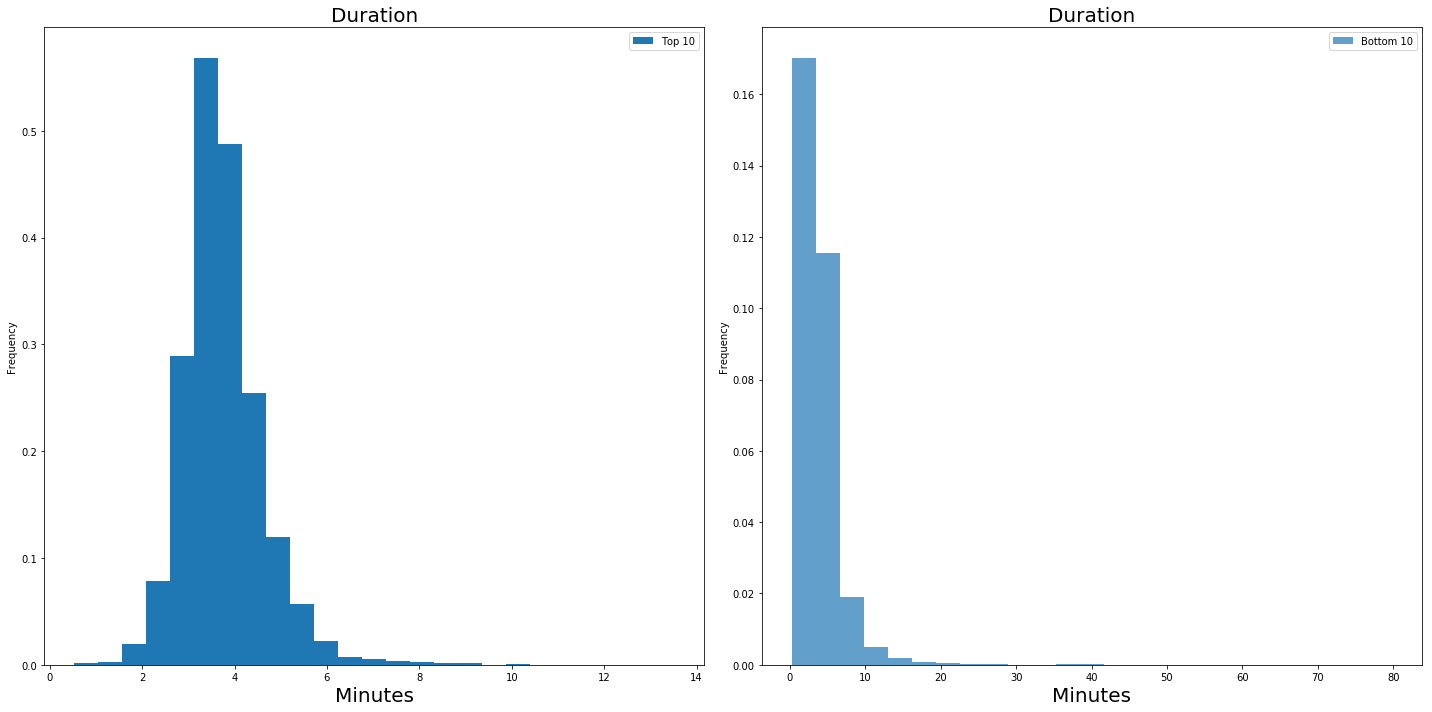

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
top_temp = top_ten.duration_ms.\
                plot.hist(bins=25,label='Top 10',density=True )
plt.title("Duration", size=20)
plt.xlabel('Minutes', size=20)
plt.legend(loc=0)

plt.subplot(1,2,2)
bottom_temp = bottom_ten.duration_ms.\
                plot.hist(bins=25, label='Bottom 10', alpha=0.7,density=True)
plt.title("Duration", size=20)
plt.xlabel('Minutes', size=20)
plt.legend(loc=0)

plt.tight_layout()

print("Means:")
print("Top 10% Duration mean: ", top_ten.duration_ms.mean())
print("Bottom 10% Duration mean: ", bottom_ten.duration_ms.mean())

print("\nMax:")
print("Top 10% Duration max: ", int(top_ten.duration_ms.max()))
print("Bottom 10% Duration max: ", int(bottom_ten.duration_ms.max()))

### Can we Predict?

Now that we have visualized the effects of each musical feature between the popular and unpopular songs, we are intrested to see if we are able to predict the popularity of a song. Moreover, we want to see if there is a combination of features that make a better prediction of a songs popularity level. 

In order to do this, we first started with a linear regression to try to predict the songs. We started with a linear regression to double check that the songs do not have a linear relationship. We will be using numerical features because we did not learn about one-hot encoding but we believe that using more features may improve the model slightly. Either way, because the purpose is to display that there is no linear relationship we will be satisfied with the performance with the numerical features.

In order to do this, we are going to use the same classifier that the third reference used, which are Support Vector Machines (SVM's) with a "rbf" kernel, since when we plotted our data, we could not find a linear relationship. However, since we have such a large amount of data, it would take a long time to run SVM on almost 230,000 songs, we are going to reduce that amount by looking at a specific genre and a specific percentage of each genre. In this case, we are going to look at the top and bottom 10%, 50%, and 90% songs of the Pop, Rock, Rap, Hip-Hop, and A Capella genres. The reason as to why we are going to look at these genres is because they have songs in both the top and bottom percentiles, so we want to see if we are able to differentiate between the two and accurately classify between the popular song and the unpopular song.

That said, what we are going to do now is try different combinations of percentiles and musical features to see if some features classify better or worse than others.

In [48]:
## Linear Regression ##

# function for popularity linear prediction
def linear_prediction(df, genre):
    # preparing data for each genre
    df_genre = df[df['genre'] == genre]
    

    X_genre = df_genre[[ 'acousticness', 'danceability', 'duration_ms', 'energy',
                  'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 
                  'valence']]
    Y_genre = df_genre['popularity']
    
    # cross validation
    X_train = X_genre[:int(0.8*len(X_genre))] # Get features from train + val set.
    X_test      = X_genre[int(0.8*len(X_genre)):] # Get features from test set.     
    Y_train = Y_genre[:int(0.8*len(Y_genre))] # Get labels from train + val set.
    Y_test      = Y_genre[int(0.8*len(Y_genre)):] # Get labels from test set.
    
    # training linear regression
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    
    # training
    predictions = lm.predict(X_test)
    
    # printing mean of prediction and real
    print('prediction mean of', genre, ':', np.mean(predictions))
    print('real mean of', genre, ':', np.mean(Y_test))
    
    # scatter plot with linear line
    plt.figure()
    plt.scatter(Y_test, predictions)
    plt.plot(np.arange(80), color = 'r')
    plt.xlabel('real popularity')
    plt.ylabel('predicted popularity')
    plt.title('Linear prediction of ' + genre)
    plt.show()

prediction mean of Opera : 12.153192885111407
real mean of Opera : 19.330314009661837


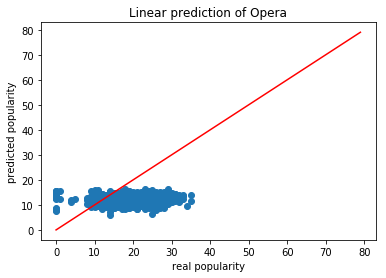

prediction mean of A Capella : 10.075157271459942
real mean of A Capella : 1.0833333333333333


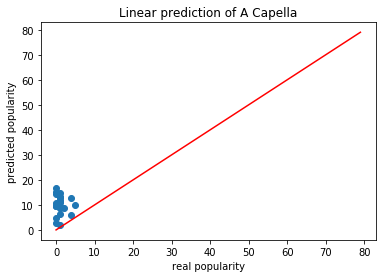

prediction mean of Alternative : 56.10040301521586
real mean of Alternative : 48.489577765900584


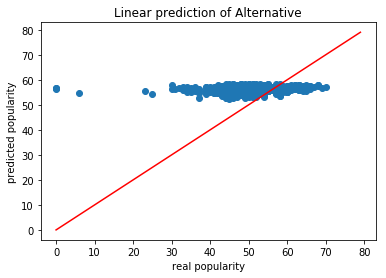

prediction mean of Blues : 52.64898416367021
real mean of Blues : 62.77391769107429


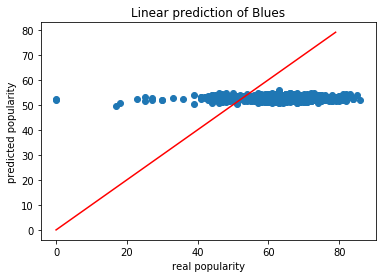

prediction mean of Dance : 57.665609071673956
real mean of Dance : 55.44112578977599


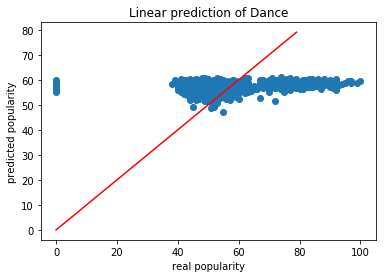

prediction mean of Pop : 67.87726809434176
real mean of Pop : 60.78381256656017


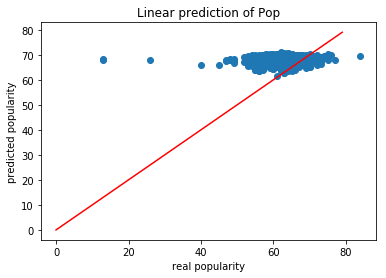

prediction mean of Electronic : 39.87877581824822
real mean of Electronic : 30.505330490405118


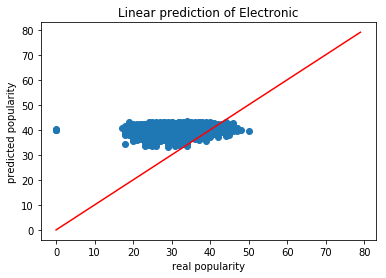

prediction mean of R&B : 54.31183140088451
real mean of R&B : 43.7793218454697


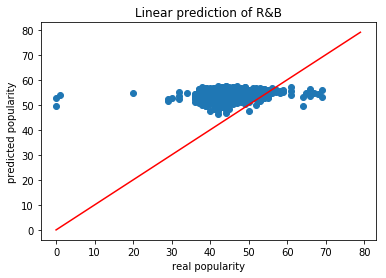

prediction mean of Children’s Music : 56.10040301521586
real mean of Children’s Music : 48.489577765900584


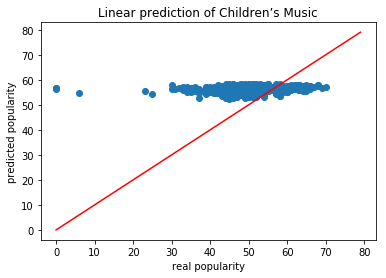

prediction mean of Folk : 51.59354316285357
real mean of Folk : 43.01129032258064


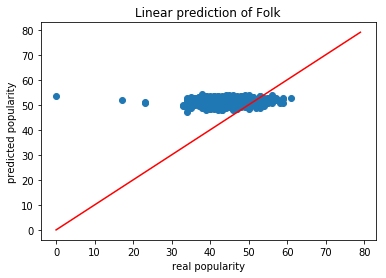

prediction mean of Anime : 56.10040301521586
real mean of Anime : 48.489577765900584


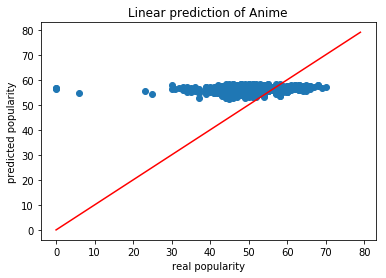

prediction mean of Rap : 62.20763968511075
real mean of Rap : 52.90741743367623


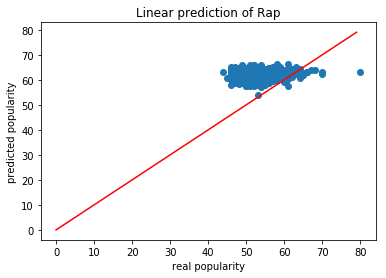

prediction mean of Classical : 28.70538948191581
real mean of Classical : 31.89524838012959


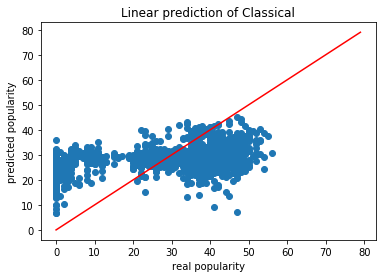

prediction mean of Reggae : 36.93173779870342
real mean of Reggae : 29.94017094017094


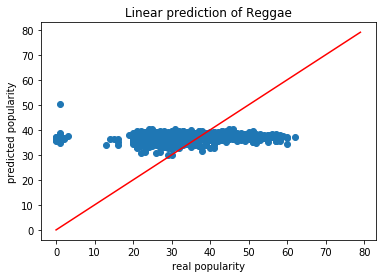

prediction mean of Hip-Hop : 60.06871053030967
real mean of Hip-Hop : 50.963959117805274


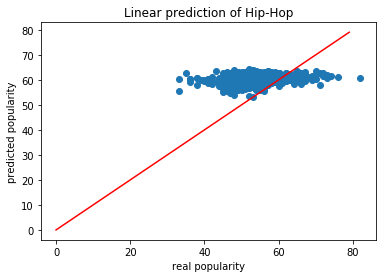

prediction mean of Comedy : 21.278797988046406
real mean of Comedy : 22.970573051109962


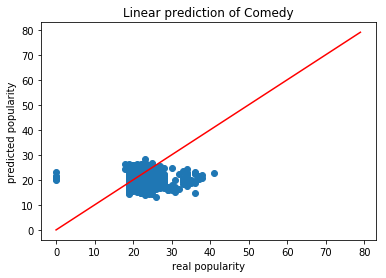

prediction mean of Country : 48.03247063469307
real mean of Country : 37.64800923254472


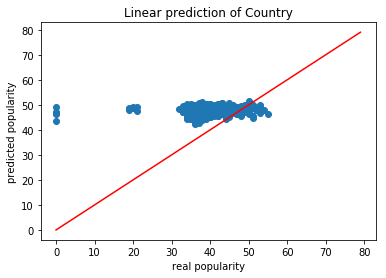

prediction mean of Reggaeton : 40.08711048588702
real mean of Reggaeton : 24.230683090705487


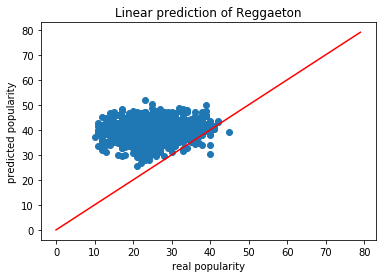

prediction mean of Ska : 27.18085146296843
real mean of Ska : 34.627605633802816


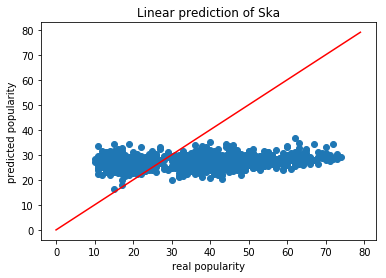

prediction mean of Indie : 56.08984886065823
real mean of Indie : 48.51702462022001


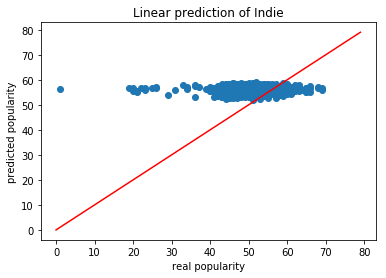

prediction mean of Rock : 61.08834560061809
real mean of Rock : 53.48194070080863


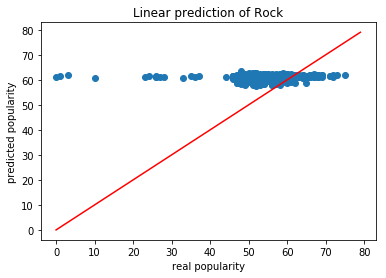

prediction mean of Soul : 48.902704831868306
real mean of Soul : 39.135313531353134


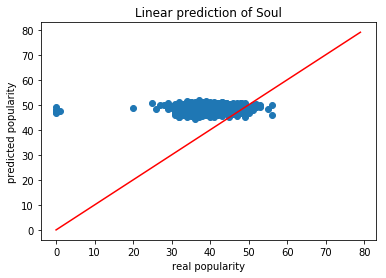

prediction mean of Soundtrack : 33.962253684092055
real mean of Soundtrack : 33.99378238341969


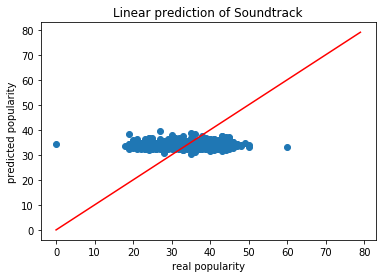

prediction mean of Jazz : 42.32553081216813
real mean of Jazz : 34.11858125992589


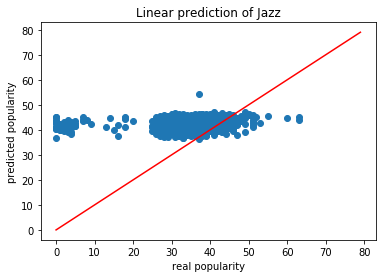

prediction mean of World : 37.17990601467074
real mean of World : 27.77802197802198


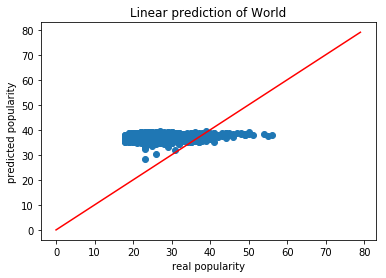

prediction mean of Movie : 13.645261887205182
real mean of Movie : 2.526888604353393


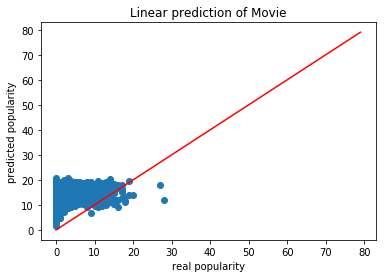

In [49]:
for genre in df['genre'].unique():
    linear_prediction(df, genre)

In [38]:
# This is where we are going to set up everything. By this, I mean this is where we are going to:
#  - Get data for a specific subset of genres
#  - Get only of portion of the new data we just got with our specific genres
#  - Get our labels and features that would be used for SVM
#  - Seperate our data into our training and testing sets.


# Get data from specific genres.
t_gen = df[(df.genre == 'Pop') | (df.genre == 'Rock') | \
           (df.genre == 'Rap') | (df.genre == 'Hip-Hop') | \
           (df.genre == 'A Capella') ]

# Get top and bottom percentiles and combine the data to a single dataframe
top = t_gen.sort_values('popularity', ascending=False).\
                head(int(len(t_gen.popularity)*(50/100)))

bottom = t_gen.sort_values('popularity').\
                head(int(len(t_gen.popularity)*(50/100)))

a_df = pd.concat([top, bottom])

# Popularity values that is used as our prediction labels
a_pop = a_df.popularity.values

'''
# Get all numerical features.
a_features = a_df[[ 'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 
    'valence']].values

'''
# Get a specific subset of features.
#  - Would change this constantly depending which subset of features we are looking at
a_features = a_df[[ ]].values

# Seperate our data to training and testing sets.
X_train_val, X_test, Y_train_val, Y_test = \
                train_test_split(a_features, a_pop, test_size=0.2, random_state=0)

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(29843, 6) (7461, 6) (29843,) (7461,)


First, let's see if the features that we visualized in our Histograms are good features for classification, which includes danceability, speechiness, energy, loudness, valence, and tempo.
- From the histograms we were able to see that these features do have significance in distingushing popular and unpopular songs, so we are expecting these features to be good classifiers.

In [37]:
# Classifying using only the values that we drew histograms for 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.15482573726541554

In [39]:
# Classifying using only the values that we drew histograms for 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.06956172094893445

In [35]:
# Classifying using only the values that we drew histograms for 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.06790766939687268

- Intrestingly enough, when we used the 6 features used in our histogram comparisons, we get a pretty poor classifier with an average accuray of 11%. Why could this be? It's not clear. Perhaps even if the histograms showed a clear difference between popular and unpopular, it may not be enough to just find this distinction. Or perhaps we are missing a key feature and all we need to do is integrate it to our list of features. That said, The next step would then be to try classifying with a single feature and then a pair of features.

Since combining all of the features performed poorly, let's see if using a single feature would do better. In this case, we would use the features that showed the most significant difference in the histograms, which are Energy and Loudness.

- Using Energy our our only feature

In [184]:
# Classifying using energy with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.1333780160857909

In [186]:
# Classifying using energy with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.052539874011526606

In [188]:
# Classifying using energy with 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.05443037974683544

- Using Loudness our our only feature

In [190]:
# Classifying using loudness with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.1380697050938338

In [192]:
# Classifying using loudness with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.05307599517490953

In [194]:
# Classifying using loudness with 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.05815338793745346

These two single features also did not perform that well with each having about an average accuracy score of 8%. This lets us know that pehaps it's not a single feature that makes a song popular, but multiple. Let us now see what happens if we were to combine the energy and loudness feature, hopefully getting a better classifier.

In [196]:
# Classifying using loudness and energy with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.13605898123324398

In [198]:
# Classifying using loudness and energy with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.052941964884063795

In [200]:
# Classifying using loudness and energy with 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test) 

0.06284437825763217

Even when combining the two features, we are still getting an average accuracy score of 8%. So, perhaps we are looking at the wrong feature. The only feature that was hard to interpret from the histogram was the duration feature. Let's try this out as a feature and see if it does better than the features in which we were able to find a clear distinction.

In [225]:
# Classifying using duration_ms with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.443029490616622

In [27]:
# Classifying using duration_ms with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.36550060313630883

In [229]:
# Classifying using duration_ms with 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.6242740134028295

Intresting! The duration feature was actually a good classifier with an average accuracy score of 48%. This gives us a new insight as to what makes a song popular.

- This makes sense as to why the duration of a song would affect the songs popularity. People have a short attention span, so if a song is really long, people would most likely get bored of the song and skip to the next one. 

Now that we know duration_ms is a good feature for classifying, let's see what happens if we were to pair it up with another feature, in this case, energy.

In [29]:
# Classifying duration_ms and energy with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.44168900804289546

In [31]:
# Classifying duration_ms and energy with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.36925345127998926

In [33]:
# Classifying duration_ms and energy with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.6291139240506329

Even after combining duration_ms with another feature (energy), we are still getting the same performace as if duration_ms was the only feature as we are still getting an average accuracy of 48%.

Lastly, let's see what would happen if we were to use all of the numerical features.

In [233]:
# Classifying using all numerical features with 10%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.4886058981233244

In [23]:
# Classifying using all numerical features with 50%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.5095831657954698

In [25]:
# Classifying using all numerical features with 90%
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.8545048399106479

When using all of the numerical features, we get a much better classifier with an average accuracy score of 62%, with 85% being the highest accuracy. This suggest that the best way to classify the popularity of a song is not by a single feature or a distinct combination of feature, but by using all of the numerical features provided by the dataset

In [26]:
# Classifying using all numerical features with all of the data
cl = SVC(gamma='auto', kernel='rbf')
cl.fit(X_train_val,Y_train_val).score(X_test, Y_test)

0.39868951612903225

Finally, lets see how correlated each feature are related to each other.

In [25]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.422083,0.294233,-0.041150,0.277652,-0.230042,-0.203147,0.413276,-0.194673,0.114957,0.119224
acousticness,-0.422083,1.000000,-0.379441,0.035410,-0.723150,0.323748,0.086149,-0.698187,0.165105,-0.241385,-0.335430
danceability,0.294233,-0.379441,1.000000,-0.116437,0.338110,-0.360938,-0.034043,0.451336,0.135728,0.018950,0.542405
duration_ms,-0.041150,0.035410,-0.116437,1.000000,-0.058045,0.094618,0.006760,-0.068716,-0.017621,-0.027957,-0.135970
energy,0.277652,-0.723150,0.338110,-0.058045,1.000000,-0.388705,0.182697,0.816640,0.141294,0.228067,0.449463
instrumentalness,-0.230042,0.323748,-0.360938,0.094618,-0.388705,1.000000,-0.131840,-0.517373,-0.173734,-0.108424,-0.301990
liveness,-0.203147,0.086149,-0.034043,0.006760,0.182697,-0.131840,1.000000,0.035792,0.519542,-0.055556,0.018264
loudness,0.413276,-0.698187,0.451336,-0.068716,0.816640,-0.517373,0.035792,1.000000,-0.008912,0.229110,0.407057
speechiness,-0.194673,0.165105,0.135728,-0.017621,0.141294,-0.173734,0.519542,-0.008912,1.000000,-0.085619,0.035007
tempo,0.114957,-0.241385,0.018950,-0.027957,0.228067,-0.108424,-0.055556,0.229110,-0.085619,1.000000,0.120573


Genre did not show up in the correlation above, so we could use patsy.dmatrices() to see if genre plays a role in popularity.

In [35]:
# Use regression
outcome, predictors = patsy.dmatrices('popularity ~ genre', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:25:34   Log-Likelihood:            -8.3810e+05
No. Observations:              228159   AIC:                         1.676e+06
Df Residuals:                  228133   BIC:                         1.677e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

As we could see from the printed results, 70% of popularity score can be predicted and explained by the genre.

# Ethics & Privacy

Since our dataset doesn't really have any personal information or data that could possibly violate we used a Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org) mentioned by the TA during our project proposal.

## A. Data Collection
 - [x] *A.1 Informed consent*: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [x] *A.2 Collection bias*: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [x] *A.3 Limit PII exposure*: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

## B. Data Storage
 - [x] *B.1 Data security*: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [x] *B.2 Right to be forgotten*: Do we have a mechanism through which an individual can request their personal information be removed?
 - [x] *B.3 Data retention plan*: Is there a schedule or plan to delete the data after it is no longer needed?

## C. Analysis
 - [x] *C.1 Missing perspectives*: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [x] *C.2 Dataset bias*: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [x] *C.3 Honest representation*: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [x] *C.4 Privacy in analysis*: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [x] *C.5 Auditability*: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## D. Modeling
 - [x] *D.1 Proxy discrimination*: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [x] *D.2 Fairness across groups*: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [x] *D.3 Metric selection*: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [x] *D.4 Explainability*: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [x] *D.5 Communicate bias*: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

## E. Deployment
- We are not using the deployment criteria because we are not deploying this project for any use other than testing our knowledge.

# Conclusion & Discussion

Our reported histograms suggest that the popularity of songs differ significantly based on certain continuous features, such as danceability, energy, tempo, instrumentalness, and valence. This suggests that there is some relationship between these features and a song’s popularity, and yet our team’s choice of predictive modeling may not have been the best approach for this dataset. Or results from our SVM model, of which we trained on only songs of the Pop genre that fell into the top or bottom 10% of popularity using all continuous features, gave us the best predictive results out of any other configuration. That being said, our selection of the top and bottom 10% of songs as input data may not serve as the strongest metric for predicting popularity. By only selecting the top and bottom 10%, we are only training our model to predict when a song will be extremely popular, or extremely unpopular. This suggests that our model will not generalize well to songs that received average popularity. As a further note on the performance of our model, It is possible that a more complex model is required, such as those that utilize deep-learning. Also, our team only used continuous features in our SVM model. We may have received better results by considering the categorical predictors found in our dataset (tempo, time signature, mode, etc), and thus increasing model complexity. For future investigations, all of these features could be incorporated into a similar model via one-hot encoding. Another possibility is that our current set of SVM hyperparameters is inadequate for the given dataset, and that other hyper-parameters may have resulted in a stronger model (e.g. different kernel). 


Another considerable finding, of which there is a statistically significant correlation between genre and popularity, seems to align with our histogram investigations. Thus, songs in genres like Pop and Rap may be predisposed to higher popularity than songs belonging to genres like A Capella and Opera. From this we can say that a song’s popularity can be predicted to be higher in genres that have more popular songs overall, when compared to songs that exist in genres with lower popularity overall.